In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
start='2005-01-01'
end='2024-12-31'

df=yf.download('AAPL',start=start,end=end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2005-01-03,0.952313,0.979698,0.941930,0.974732,691992000
2005-01-04,0.962092,0.985114,0.947497,0.959835,1096810400
2005-01-05,0.970518,0.981804,0.963747,0.969916,680433600
2005-01-06,0.971271,0.976688,0.952914,0.973076,705555200
2005-01-07,1.041990,1.047708,0.974280,0.978041,2227450400


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500


In [6]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2005-01-03,0.952313,0.979698,0.941930,0.974732,691992000
1,2005-01-04,0.962092,0.985114,0.947497,0.959835,1096810400
2,2005-01-05,0.970518,0.981804,0.963747,0.969916,680433600
3,2005-01-06,0.971271,0.976688,0.952914,0.973076,705555200
4,2005-01-07,1.041990,1.047708,0.974280,0.978041,2227450400


In [7]:
df=df.drop(['Date'],axis=1)
df.head()

C:\Users\kiran\AppData\Local\Temp\ipykernel_4332\3471825329.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.952313,0.979698,0.941930,0.974732,691992000
1,0.962092,0.985114,0.947497,0.959835,1096810400
2,0.970518,0.981804,0.963747,0.969916,680433600
3,0.971271,0.976688,0.952914,0.973076,705555200
4,1.041990,1.047708,0.974280,0.978041,2227450400


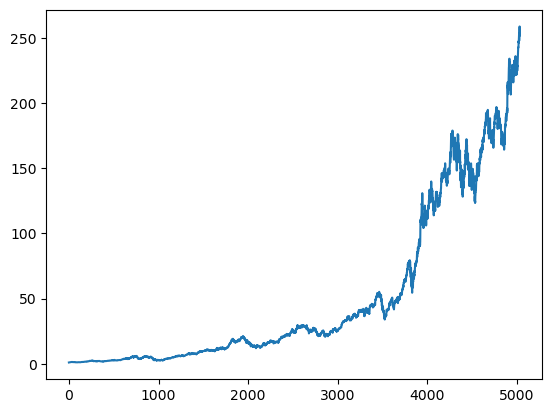

In [8]:
plt.plot(df.Close)

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.952313,0.979698,0.941930,0.974732,691992000
1,0.962092,0.985114,0.947497,0.959835,1096810400
2,0.970518,0.981804,0.963747,0.969916,680433600
3,0.971271,0.976688,0.952914,0.973076,705555200
4,1.041990,1.047708,0.974280,0.978041,2227450400
...,...,...,...,...,...
5027,254.989655,255.369227,253.171646,254.490204,40858800
5028,257.916443,257.926411,255.009620,255.209412,23234700
5029,258.735504,259.814335,257.347047,257.906429,27237100


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5027,228.969606
5028,229.357535
5029,229.859200
5030,230.346935


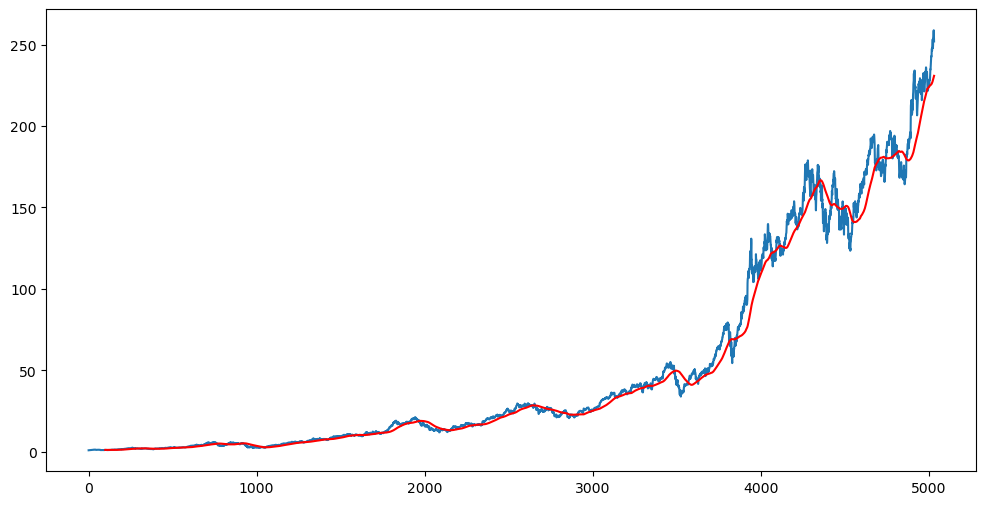

In [11]:
 plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()

In [13]:
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5027,210.752679
5028,211.182570
5029,211.614168
5030,212.039086


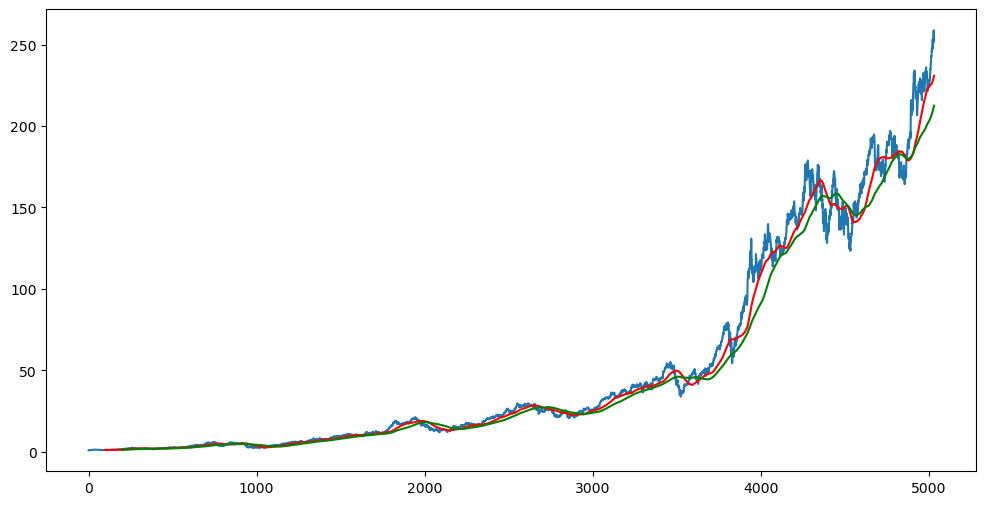

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(5032, 5)

In [16]:
# Slitting data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(3522, 1)
(1510, 1)


In [17]:
data_training.head()

Ticker,AAPL
0,0.952313
1,0.962092
2,0.970518
3,0.971271
4,1.041990


In [18]:
data_training.tail()

Ticker,AAPL
3517,35.952217
3518,35.021980
3519,37.488293
3520,37.245003
3521,37.264091


In [19]:
data_testing.head()

Ticker,AAPL
3522,37.624256
3523,37.667191
3524,33.915253
3525,35.363075
3526,35.284363


In [20]:
data_testing.tail()

Ticker,AAPL
5027,254.989655
5028,257.916443
5029,258.735504
5030,255.309296
5031,251.923019


In [21]:
data_testing.shape

(1510, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00000000e+00],
       [1.80409188e-04],
       [3.35845628e-04],
       ...,
       [6.73987125e-01],
       [6.69499103e-01],
       [6.69851237e-01]])

In [24]:
data_training.shape

(3522, 1)

In [25]:
x_train = []
y_train = []
 
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape

(3422, 100, 1)

In [27]:
y_train.shape

(3422,)

In [28]:
# ML Model

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\kiran\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - loss: 0.0449
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - loss: 0.0050
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - loss: 0.0039
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.0040
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - loss: 0.0031
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - loss: 0.0031
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - loss: 0.0028
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - loss: 0.0024
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - loss: 0.0025
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - loss: 0.0023
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - loss: 0.0022
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - loss: 0.0021
Epoch 13/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - loss: 0.0019
Epoch 14/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - loss: 0.0020
Epoch 15/50
107

In [65]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (3422, 100, 1)
y_train shape: (3422,)


In [66]:
model.save('keras_model.h5')

In [67]:
data_testing.head()

Ticker,AAPL
3522,37.624256
3523,37.667191
3524,33.915253
3525,35.363075
3526,35.284363


In [68]:
data_training.tail()

Ticker,AAPL
3517,35.952217
3518,35.021980
3519,37.488293
3520,37.245003
3521,37.264091


In [69]:
past_100_days = data_training.tail(100)

In [70]:
## final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,49.056198
1,49.089363
2,49.475452
3,49.328083
4,49.646584
...,...
1605,254.989655
1606,257.916443
1607,258.735504
1608,255.309296


In [71]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06734689],
       [0.06749441],
       [0.06921174],
       ...,
       [1.        ],
       [0.98476023],
       [0.96969808]])

In [72]:
input_data.shape

(1610, 1)

In [73]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])
    
    

In [74]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1510, 100, 1)
(1510,)


In [75]:
y_predicted = model.predict(x_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [76]:
y_predicted.shape

(1510, 1)

In [77]:
y_test.shape

(1510,)

In [78]:
y_test

array([0.01649764, 0.01668861, 0.        , ..., 1.        , 0.98476023,
       0.96969808])

In [88]:
y_predicted

array([ 43.252747,  42.96632 ,  42.689896, ..., 230.8385  , 231.5481  ,
       232.28116 ], dtype=float32)

In [89]:
scaler.scale_

array([0.004448])

In [96]:
# scale_factor = 1/0.02134523
# y_predicted = y_predicted * scale_factor
# y_test = y_test * scale_factor
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data_training)
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


In [97]:
y_predicted

array([ 528970.1 ,  525479.4 ,  522110.56, ..., 2815118.5 , 2823766.2 ,
       2832700.5 ], dtype=float32)

In [98]:
y_test

array([ 460374.47650897,  460897.72762905,  415172.0419204 , ...,
       3155105.51789873, 3113349.56712044, 3072080.27940079])

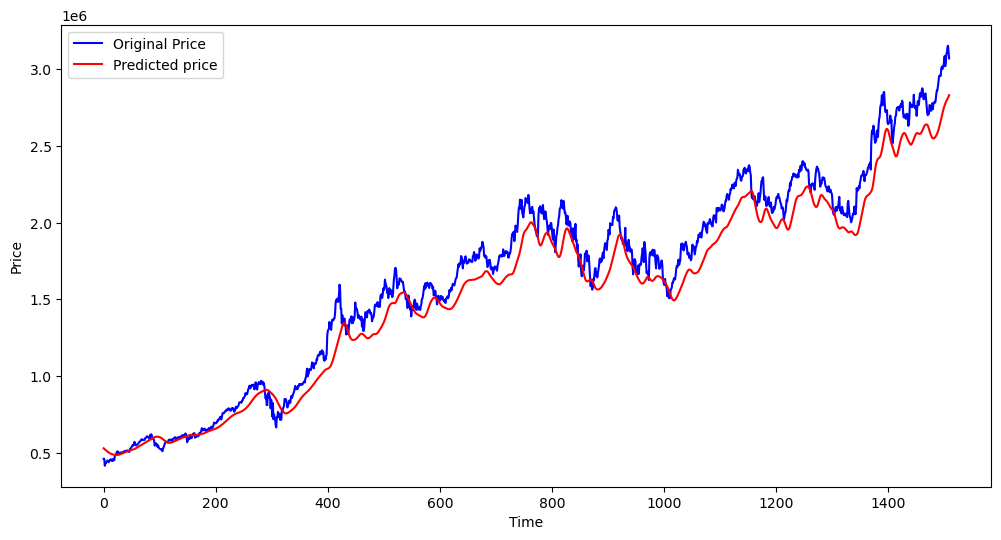

In [99]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
mse = mean_squared_error(y_test,y_predicted)
print(mse)
r2 = r2_score(y_test, y_predicted)
print(r2)
non_zero_indices = y_test != 0  # Filter out zero values
mape = np.mean(np.abs((y_test[non_zero_indices] - y_predicted[non_zero_indices]) / y_test[non_zero_indices])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")




21257614545.535065
0.9511750772643862
Mean Absolute Percentage Error (MAPE): 7.14%
